In [7]:
import sys
sys.path.append("..") 

In [8]:
# Import libraries
import numpy as np
import pandas as pd

import sqlite3

import shap

import joblib

from src.feature_engineering import TelecomFeatureEngineer

print("NumPy:", np.__version__)
print("SHAP:", shap.__version__)

NumPy: 2.2.6
SHAP: 0.50.0


### Load artifacts

In [11]:
# Load preprocessor and ML model
preprocessor = joblib.load("../artifacts/preprocessor.joblib")
rf = joblib.load("../artifacts/churn_model_rf.joblib")

In [12]:
# Load the dataset
conn = sqlite3.connect("../data/telco_churn.db")
df = pd.read_sql_query("SELECT * FROM vw_churn_training_dataset", conn)
conn.close()

In [13]:
X = df.drop(columns=["customer_id", "snapshot_date", "churn_target"])
y = df["churn_target"].astype(int)

X_transformed = preprocessor.transform(X)

### SHAP Explainer

In [ ]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_transformed)


In [17]:
shap_values.shape

(7043, 54, 2)

In [19]:
shap_vals_churn = shap_values[:, :, 1]
print("X_transformed:", X_transformed.shape)
print("shap_vals_churn:", shap_vals_churn.shape)
print("feature_names:", len(feature_names))


X_transformed: (7043, 54)
shap_vals_churn: (7043, 54)
feature_names: 54


### Global Explainability

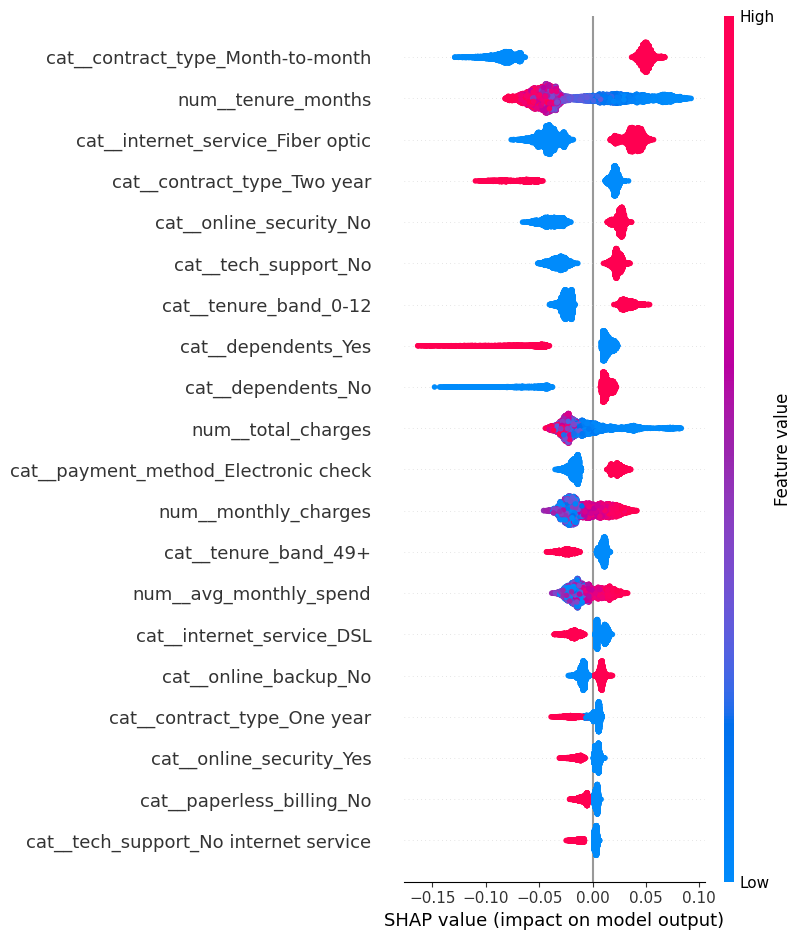

In [21]:
feature_names = preprocessor.named_steps["ct"].get_feature_names_out()

shap.summary_plot(
    shap_vals_churn,
    X_transformed,
    feature_names=feature_names,
    show=True
)


### Directional Insight

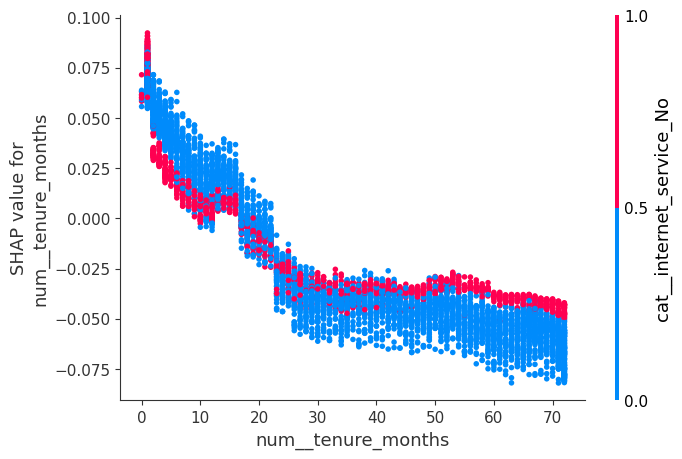

In [23]:
shap.dependence_plot(
    "num__tenure_months",
    shap_vals_churn,
    X_transformed,
    feature_names=feature_names
)


### Local Explanation

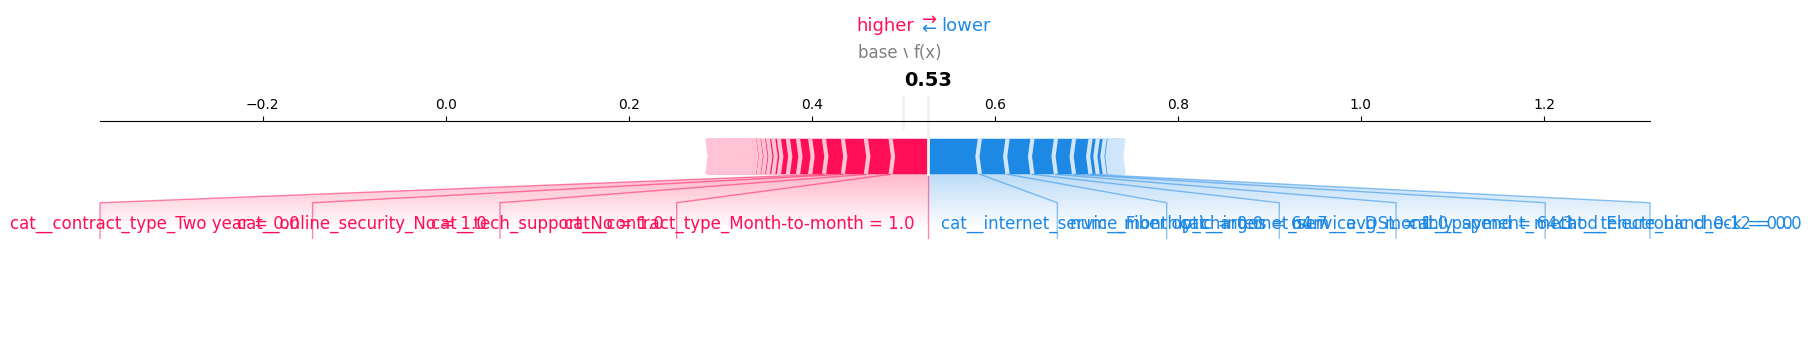

In [26]:
idx = 10  # any row index

# robust expected value for churn class
base_value = explainer.expected_value[1] if hasattr(explainer.expected_value, "__len__") else explainer.expected_value

shap.force_plot(
    base_value,
    shap_vals_churn[idx],
    X_transformed[idx],
    feature_names=feature_names,
    matplotlib=True
)
